<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana11/MinimosCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI")
!ls

Parcial2    Semana1   Semana11	Semana3  Semana5  Semana7  Semana9
ProyectoML  Semana10  Semana2	Semana4  Semana6  Semana8


In [13]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MinimosLineal.txt'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana11/Data/MinimosLineal.txt'

In [14]:
data = np.loadtxt(file)
x = data[:,0]
y = data[:,1]

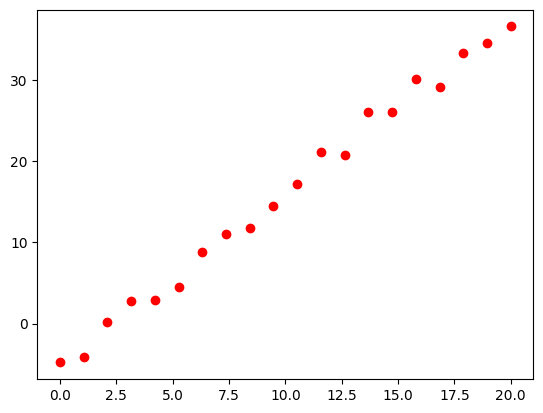

In [15]:
plt.scatter(x,y,color='red')

In [29]:
def GetFit(x,y,n=1):

  l = x.shape[0] # Cantidad de datos
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  # Fitting
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  #print(AT)

  xsol = np.dot(np.linalg.inv(AT),bT)

  return xsol

In [30]:
params = GetFit(x,y)
params

array([-5.12918553,  2.12503681])

In [31]:
def GetModel(x,p):

  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [33]:
import sympy as sym
X = sym.Symbol('x',real=True)
Y = GetModel(X,params)
Y

2.12503680800827*x - 5.12918552885297

In [34]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,params)

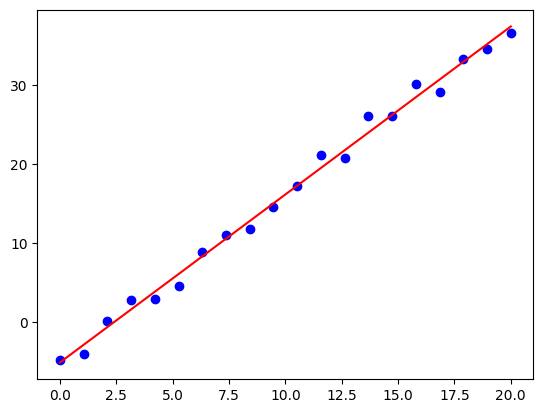

In [35]:
plt.plot(_x,_y,color='red')
plt.scatter(x,y,color='blue')